<a href="https://colab.research.google.com/github/rhwogus/AI_lab/blob/main/LAB_audio_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
pip3 install deep_phonemizer

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for deep_phonemizer: filename=deep_phonemizer-0.0.19-py3-none-any.whl size=33272 sha256=57092f835a3ae8a8584b7d8a51775158055588a431a71e933db082c44a3a5a9c
  Stored in directory: /root/.cache/pip/wheels/b9/d7/45/f2ae07184a29327b2a7f93b1f734a936c3a34e57225fca603b
Successfully built deep_phonemizer


In [2]:
import torch
import torchaudio

torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

print(torch.__version__)
print(torchaudio.__version__)
print(device)

2.8.0+cu126
2.8.0+cu126
cuda


In [4]:
import IPython
import matplotlib.pyplot as plt

In [20]:
symbols = "_-!'(),.:;? abcdefghijklmnopqrstuvwxyz"
look_up = {s: i for i, s in enumerate(symbols)}
symbols = set(symbols)


def text_to_sequence(text):
    text = text.lower()
    return [look_up[s] for s in text if s in symbols]


text = "Hello, my name is Jaehyun. I am studying Software Engineering at Chungbuk National University."
print(text_to_sequence(text))

[19, 16, 23, 23, 26, 6, 11, 24, 36, 11, 25, 12, 24, 16, 11, 20, 30, 11, 21, 12, 16, 19, 36, 32, 25, 7, 11, 20, 11, 12, 24, 11, 30, 31, 32, 15, 36, 20, 25, 18, 11, 30, 26, 17, 31, 34, 12, 29, 16, 11, 16, 25, 18, 20, 25, 16, 16, 29, 20, 25, 18, 11, 12, 31, 11, 14, 19, 32, 25, 18, 13, 32, 22, 11, 25, 12, 31, 20, 26, 25, 12, 23, 11, 32, 25, 20, 33, 16, 29, 30, 20, 31, 36, 7]


In [21]:
processor = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH.get_text_processor()

text = "Hello, my name is Jaehyun. I am studying Software Engineering at Chungbuk National University."
processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[19, 16, 23, 23, 26,  6, 11, 24, 36, 11, 25, 12, 24, 16, 11, 20, 30, 11,
         21, 12, 16, 19, 36, 32, 25,  7, 11, 20, 11, 12, 24, 11, 30, 31, 32, 15,
         36, 20, 25, 18, 11, 30, 26, 17, 31, 34, 12, 29, 16, 11, 16, 25, 18, 20,
         25, 16, 16, 29, 20, 25, 18, 11, 12, 31, 11, 14, 19, 32, 25, 18, 13, 32,
         22, 11, 25, 12, 31, 20, 26, 25, 12, 23, 11, 32, 25, 20, 33, 16, 29, 30,
         20, 31, 36,  7]])
tensor([94], dtype=torch.int32)


In [22]:
print([processor.tokens[i] for i in processed[0, : lengths[0]]])

['h', 'e', 'l', 'l', 'o', ',', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'j', 'a', 'e', 'h', 'y', 'u', 'n', '.', ' ', 'i', ' ', 'a', 'm', ' ', 's', 't', 'u', 'd', 'y', 'i', 'n', 'g', ' ', 's', 'o', 'f', 't', 'w', 'a', 'r', 'e', ' ', 'e', 'n', 'g', 'i', 'n', 'e', 'e', 'r', 'i', 'n', 'g', ' ', 'a', 't', ' ', 'c', 'h', 'u', 'n', 'g', 'b', 'u', 'k', ' ', 'n', 'a', 't', 'i', 'o', 'n', 'a', 'l', ' ', 'u', 'n', 'i', 'v', 'e', 'r', 's', 'i', 't', 'y', '.']


In [23]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()

text = "Hello, my name is Jaehyun. I am studying Software Engineering at Chungbuk National University."
with torch.inference_mode():
    processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[54, 20, 65, 69,  6, 11, 66, 32, 11, 67, 48, 66, 11, 55, 94, 11, 63, 40,
         54, 93, 20, 67,  7, 11, 32, 11, 16, 66, 11, 79, 81, 20, 38, 59, 55, 68,
         11, 79, 24, 52, 81, 92, 40, 78, 11, 40, 67, 63, 20, 67, 55, 78, 55, 68,
         11, 16, 81, 11, 37, 20, 68, 36, 20, 64, 11, 67, 16, 80, 20, 67, 20, 65,
         11, 93, 87, 67, 20, 91, 44, 79, 20, 81, 59,  7]])
tensor([84], dtype=torch.int32)


In [9]:
print([processor.tokens[i] for i in processed[0, : lengths[0]]])

['HH', 'AH', 'L', 'OW', ' ', 'W', 'ER', 'L', 'D', '!', ' ', 'T', 'EH', 'K', 'S', 'T', ' ', 'T', 'AH', ' ', 'S', 'P', 'IY', 'CH', '!']


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


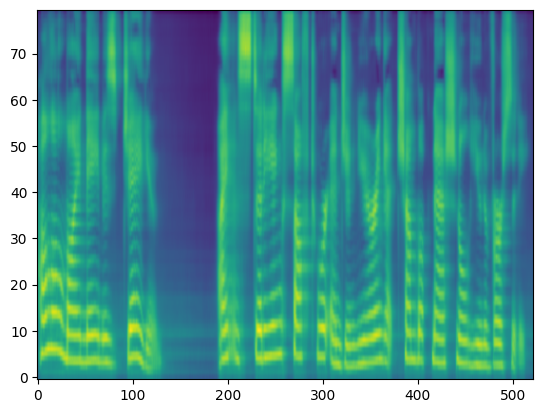

In [24]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)

text = "Hello, my name is Jaehyun. I am studying Software Engineering at Chungbuk National University."

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, _, _ = tacotron2.infer(processed, lengths)


_ = plt.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")

torch.Size([80, 515])
torch.Size([80, 534])
torch.Size([80, 517])


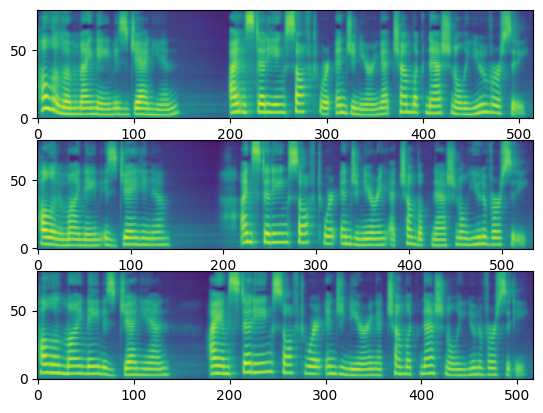

In [25]:
def plot():
    fig, ax = plt.subplots(3, 1)
    for i in range(3):
        with torch.inference_mode():
            spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
        print(spec[0].shape)
        ax[i].imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")


plot()

In [26]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

text = "Hello, my name is Jaehyun. I am studying Software Engineering at Chungbuk National University."

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms, lengths = vocoder(spec, spec_lengths)

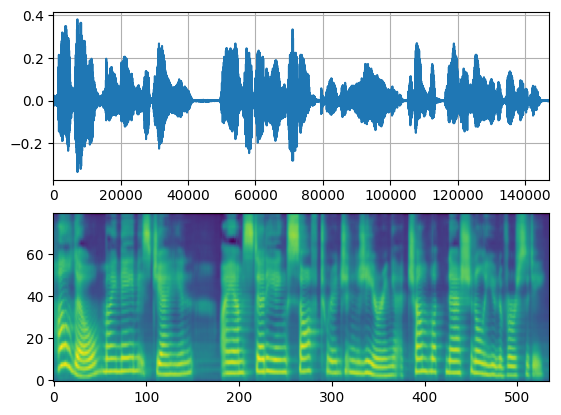

In [27]:
def plot(waveforms, spec, sample_rate):
    waveforms = waveforms.cpu().detach()

    fig, [ax1, ax2] = plt.subplots(2, 1)
    ax1.plot(waveforms[0])
    ax1.set_xlim(0, waveforms.size(-1))
    ax1.grid(True)
    ax2.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")
    return IPython.display.Audio(waveforms[0:1], rate=sample_rate)


plot(waveforms, spec, vocoder.sample_rate)

In [28]:
bundle = torchaudio.pipelines.TACOTRON2_GRIFFINLIM_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
waveforms, lengths = vocoder(spec, spec_lengths)

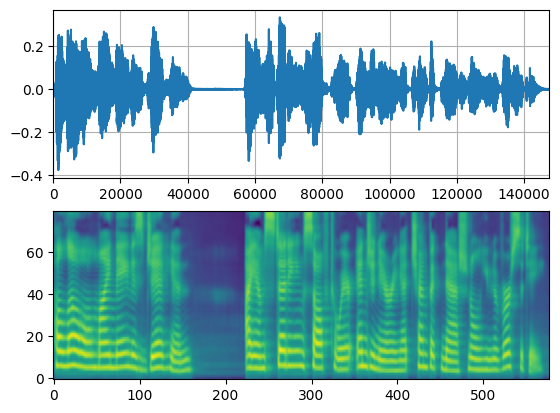

In [29]:
plot(waveforms, spec, vocoder.sample_rate)

In [30]:
# Workaround to load model mapped on GPU
# https://stackoverflow.com/a/61840832
waveglow = torch.hub.load(
    "NVIDIA/DeepLearningExamples:torchhub",
    "nvidia_waveglow",
    model_math="fp32",
    pretrained=False,
)
checkpoint = torch.hub.load_state_dict_from_url(
    "https://api.ngc.nvidia.com/v2/models/nvidia/waveglowpyt_fp32/versions/1/files/nvidia_waveglowpyt_fp32_20190306.pth",  # noqa: E501
    progress=False,
    map_location=device,
)
state_dict = {key.replace("module.", ""): value for key, value in checkpoint["state_dict"].items()}

waveglow.load_state_dict(state_dict)
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to(device)
waveglow.eval()

with torch.no_grad():
    waveforms = waveglow.infer(spec)

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
/usr/local/lib/python3.12/dist-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


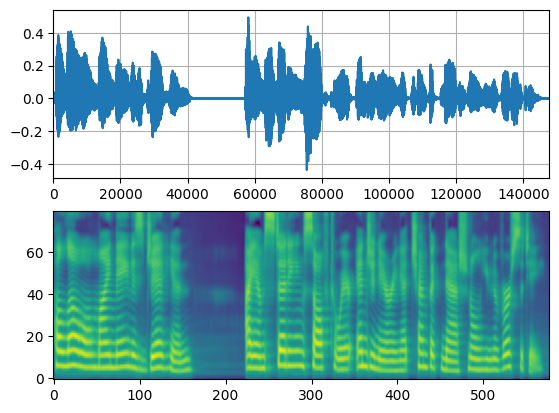

In [31]:
plot(waveforms, spec, 22050)